<a href="https://colab.research.google.com/github/atmendes/Data-Analytics-Foundations/blob/main/Last_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import SQL pip install and then the SQL packege "pandasql"= Combo of panda and sql. Need exclamation because we do not have it installed - it's outside


In [1]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=b21af2db8959bc788164713d555776eac45264d5ef23c374c9a3ef3504712630
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
#import the packeges

In [13]:
import numpy as np

import pandas as pd
import pandasql as ps #the only one which is not standard
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/911.csv')

In [ ]:
# If we want to keep this csv- Must add csv- Click the folder and then download since it's too large

In [44]:
df.to_csv('911 Data.csv')

In [ ]:
# df= dataset, head() - fist five or you can do tail Ask what the data looks like head()

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
#create a query and tell python what to do with it. Select the first five rows from df

In [8]:
query = "Select *From df limit 5"

In [9]:
query

'Select *From df limit 5'

In [ ]:
#

In [11]:
print('\n')
print(ps.sqldf(query, locals()))



         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT 

In [ ]:
#Pip freeze- Checks all libraries installed

# Basic Questions

#What are the top 5 zipcodes for 911 calls

In [ ]:
#Indexing the zip and give the top zip codes
#Count the values and then give the first five

In [12]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [ ]:
query = "Select * From df limit 5"
print('\n')
print(ps.sqldf(query, locals()))

# Above code and below give same result


In [ ]:
# Select everything from the list, count the zips and group by them: limit only five

In [15]:
query = "Select * From (select zip, count(*) from df group by zip order by 2 desc) limit 5"
print('\n')
print(ps.sqldf(query, locals()))



       zip  count(*)
0      NaN     12855
1  19401.0      6979
2  19464.0      6643
3  19403.0      4854
4  19446.0      4748


#What are the top townships

In [ ]:
#Count the values of twp and give the top 5

In [17]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [18]:
query = "Select * From (select twp, count(*) from df group by zip order by 2 desc) limit 5"
print('\n') # New line
print(ps.sqldf(query, locals()))



                twp  count(*)
0          DOUGLASS     12855
1        NORRISTOWN      6979
2         POTTSTOWN      6643
3  LOWER PROVIDENCE      4854
4     UPPER GWYNEDD      4748


In [ ]:
#Show the new line using print ('\n')

In [19]:
print('\nSomething\rsomthing else')


somthing else


#What is the most common reason for a 911 call based off emergency?

# First look at your data below

In [ ]:
#Show the data- first five unless you fill number into the ()

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
#Count the titles

In [22]:
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -        23066
Traffic: DISABLED VEHICLE -         7702
Fire: FIRE ALARM                    5496
EMS: RESPIRATORY EMERGENCY          5112
EMS: CARDIAC EMERGENCY              5012
                                   ...  
EMS: DISABLED VEHICLE                  1
Fire: UNKNOWN MEDICAL EMERGENCY        1
Fire: DIABETIC EMERGENCY               1
EMS: BOMB DEVICE FOUND                 1
Fire: SYNCOPAL EPISODE                 1
Name: title, Length: 110, dtype: int64

In [ ]:
#gives the same info as above code

#Select distict titles from the dataset

In [ ]:
# Use query to select disctinct title from the data to df

In [23]:
query = "Select distinct title from df"
print('\n') # New line
print(ps.sqldf(query, locals()))



                        title
0      EMS: BACK PAINS/INJURY
1     EMS: DIABETIC EMERGENCY
2         Fire: GAS-ODOR/LEAK
3      EMS: CARDIAC EMERGENCY
4              EMS: DIZZINESS
..                        ...
105    EMS: BOMB DEVICE FOUND
106    Fire: SYNCOPAL EPISODE
107  EMS: INDUSTRIAL ACCIDENT
108             EMS: DROWNING
109           EMS: SUSPICIOUS

[110 rows x 1 columns]


#We find that the title field is structered by reason : type of reason or departments- code below

In [ ]:
# Create the function (reason) with the word lambda (anonymous functions, serverless function) and then split the title

In [27]:
df['reason']=df['title'].apply(lambda title: title.split(':')[0])

In [ ]:
# Demonstrate the data columns with the new reason section

In [28]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [ ]:
#Split the title and print the first part (0)

In [25]:
def title():
          title.split(':')[0]

In [ ]:
# Example of how to use lambda

In [26]:
lambda x: x +2

<function __main__.<lambda>(x)>

In [ ]:
# x is a parameter inside the fucntion. x does not exist


In [ ]:
# Grab the reason that was created and then give the count of each

In [30]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

In [ ]:
# PLot of the data of the column 'reason'

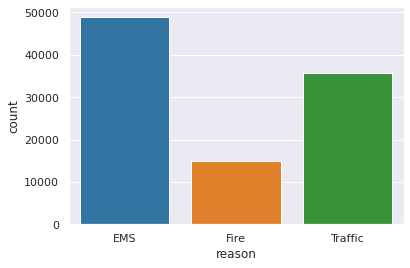

In [34]:
sns.countplot(x='reason',data=df, palette= 'tab10')

In [ ]:
# drop the column 'title', axis 1= first axis

In [38]:
data = df.drop(['title'], axis=1)

In [39]:
data.head

<bound method NDFrame.head of              lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LOWER 

In [ ]:
#Create a string called 'this is a string'

In [40]:
strn = 'This is a string'

In [ ]:
#Split the string where 'a' is and show the first part of the string

In [42]:
strn.split('a') [0] # The zero only gives the first part of the string

'This is '

In [43]:
strn.split('a') [1] # Gives the second half

' string'